# Employee Salary EDA

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [184]:
df = pd.read_csv("C:/Dataset-DS/Employers_data.csv")
df

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000


In [185]:
df.shape

(10000, 10)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [187]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455900,12.370900,115381.500000
std,2886.89568,10.000213,9.148951,46066.139047
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [188]:
df.drop(columns='Employee_ID' ,inplace=True)
df

,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...
9995,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000


In [189]:
df.duplicated().sum()

0

In [190]:
df.columns

Index(['Name', 'Age', 'Gender', 'Department', 'Job_Title', 'Experience_Years',
       'Education_Level', 'Location', 'Salary'],
      dtype='object')

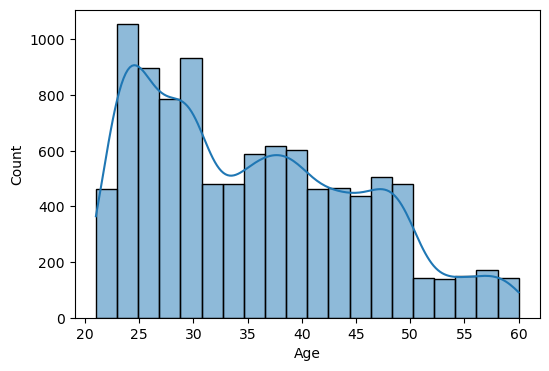

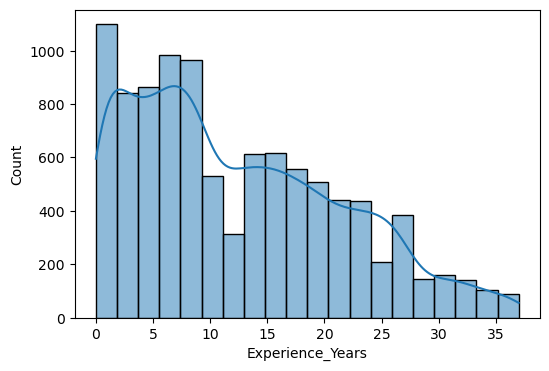

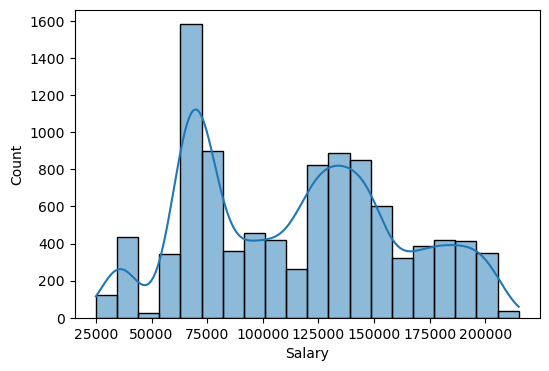

In [191]:
numeric_columns = ['Age', 'Experience_Years', 'Salary']

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)

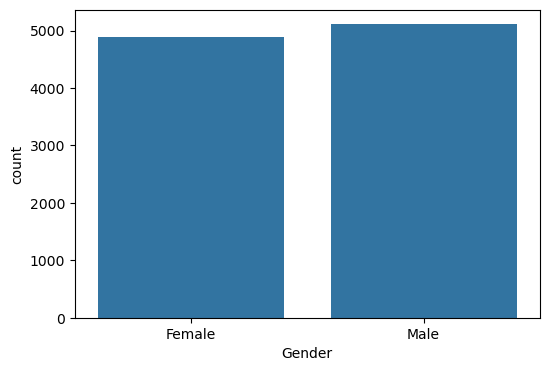

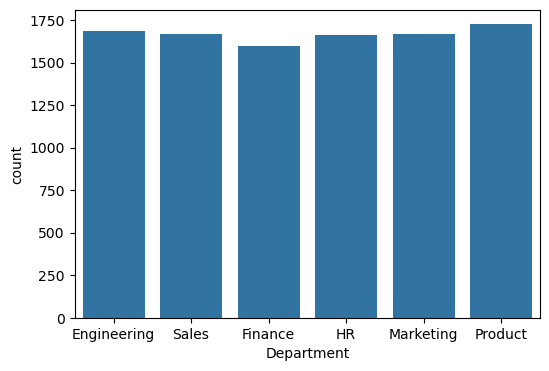

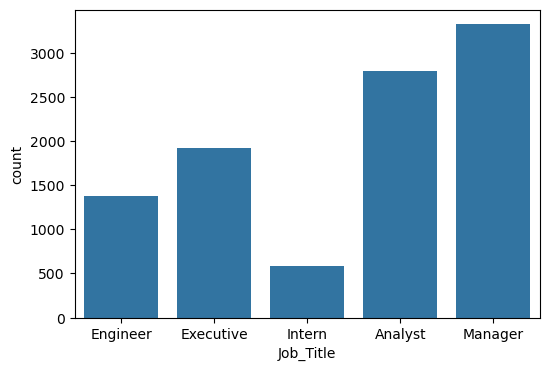

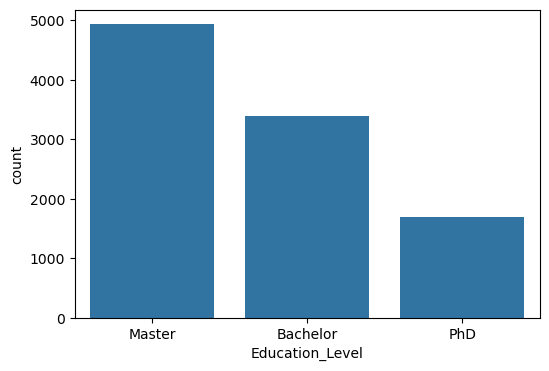

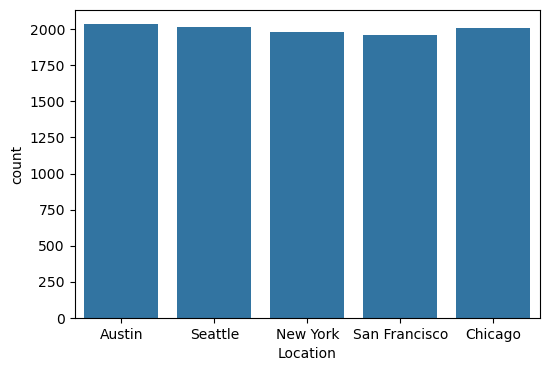

In [192]:
non_num = ['Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']

for col in non_num:
    plt.figure(figsize=(6,4))
    sns.countplot(x = df[col])

<Axes: >

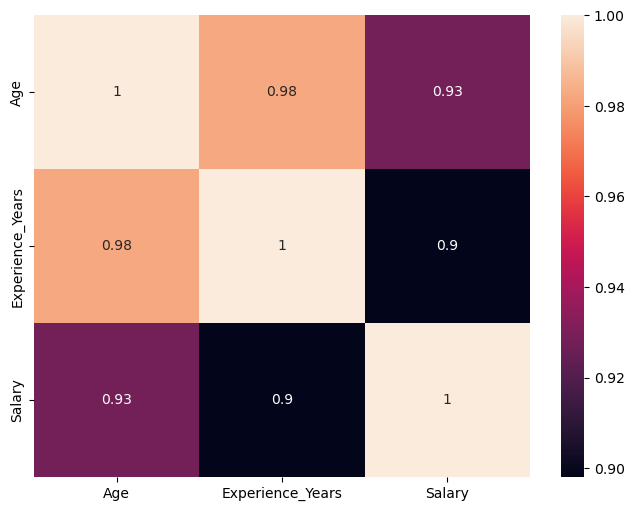

In [193]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Data cleaning and Preprocessing

In [194]:
df_cleaned = df.copy()
df_cleaned

,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...
9995,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000


In [195]:
df_cleaned.drop_duplicates(inplace=True)

In [196]:
df_cleaned.isnull().sum()

Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64

In [197]:
df_cleaned.dtypes

Name                object
Age                  int64
Gender              object
Department          object
Job_Title           object
Experience_Years     int64
Education_Level     object
Location            object
Salary               int64
dtype: object

In [198]:
df_cleaned.drop(columns='Name', index=1)

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master,Austin,90000
2,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,25,Female,HR,Analyst,2,Master,Seattle,70000
5,35,Male,Finance,Manager,8,PhD,New York,125000
...,...,...,...,...,...,...,...,...
9995,51,Male,Sales,Executive,28,Master,Austin,185000
9996,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,57,Male,Sales,Executive,30,PhD,New York,200000
9998,37,Female,Engineering,Manager,14,Master,New York,135000


In [199]:
df_cleaned['Gender'] = df_cleaned['Gender'].replace({'Male': 0, 'Female': 1})
df_cleaned

,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,Merle Ingram,24,1,Engineering,Engineer,1,Master,Austin,90000
1,John Mayes,56,0,Sales,Executive,33,Master,Seattle,195000
2,Carlos Wille,21,0,Engineering,Intern,1,Bachelor,New York,35000
3,Michael Bryant,30,0,Finance,Analyst,9,Bachelor,New York,75000
4,Paula Douglas,25,1,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...
9995,Thomas Rossin,51,0,Sales,Executive,28,Master,Austin,185000
9996,Christie King,36,1,Sales,Executive,9,PhD,San Francisco,165000
9997,Alfred Keller,57,0,Sales,Executive,30,PhD,New York,200000
9998,Margaret Gomez,37,1,Engineering,Manager,14,Master,New York,135000


In [200]:
df_cleaned.rename(columns={
    "Gender" : "is_female"
}, inplace=True)

In [201]:
df_cleaned

,Name,Age,is_female,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,Merle Ingram,24,1,Engineering,Engineer,1,Master,Austin,90000
1,John Mayes,56,0,Sales,Executive,33,Master,Seattle,195000
2,Carlos Wille,21,0,Engineering,Intern,1,Bachelor,New York,35000
3,Michael Bryant,30,0,Finance,Analyst,9,Bachelor,New York,75000
4,Paula Douglas,25,1,HR,Analyst,2,Master,Seattle,70000
...,...,...,...,...,...,...,...,...,...
9995,Thomas Rossin,51,0,Sales,Executive,28,Master,Austin,185000
9996,Christie King,36,1,Sales,Executive,9,PhD,San Francisco,165000
9997,Alfred Keller,57,0,Sales,Executive,30,PhD,New York,200000
9998,Margaret Gomez,37,1,Engineering,Manager,14,Master,New York,135000


In [202]:
df_cleaned = pd.get_dummies(data=df_cleaned, columns=['Department',	'Job_Title','Education_Level'])
df_cleaned

,Name,Age,is_female,Experience_Years,Location,Salary,Department_Engineering,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Analyst,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Bachelor,Education_Level_Master,Education_Level_PhD
0,Merle Ingram,24,1,1,Austin,90000,True,False,False,False,False,False,False,True,False,False,False,False,True,False
1,John Mayes,56,0,33,Seattle,195000,False,False,False,False,False,True,False,False,True,False,False,False,True,False
2,Carlos Wille,21,0,1,New York,35000,True,False,False,False,False,False,False,False,False,True,False,True,False,False
3,Michael Bryant,30,0,9,New York,75000,False,True,False,False,False,False,True,False,False,False,False,True,False,False
4,Paula Douglas,25,1,2,Seattle,70000,False,False,True,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Thomas Rossin,51,0,28,Austin,185000,False,False,False,False,False,True,False,False,True,False,False,False,True,False
9996,Christie King,36,1,9,San Francisco,165000,False,False,False,False,False,True,False,False,True,False,False,False,False,True
9997,Alfred Keller,57,0,30,New York,200000,False,False,False,False,False,True,False,False,True,False,False,False,False,True
9998,Margaret Gomez,37,1,14,New York,135000,True,False,False,False,False,False,False,False,False,False,True,False,True,False


In [203]:
df_cleaned.groupby('Location')['Salary'].max()

Location
Austin           210000
Chicago          215000
New York         215000
San Francisco    210000
Seattle          210000
Name: Salary, dtype: int64

In [204]:
df_cleaned = df_cleaned.drop(columns=['Name','Location'], axis=1)

In [205]:
df_cleaned.dtypes

Age                         int64
is_female                   int64
Experience_Years            int64
Salary                      int64
Department_Engineering       bool
Department_Finance           bool
Department_HR                bool
Department_Marketing         bool
Department_Product           bool
Department_Sales             bool
Job_Title_Analyst            bool
Job_Title_Engineer           bool
Job_Title_Executive          bool
Job_Title_Intern             bool
Job_Title_Manager            bool
Education_Level_Bachelor     bool
Education_Level_Master       bool
Education_Level_PhD          bool
dtype: object

In [206]:
df_cleaned = df_cleaned.astype('int')

In [207]:
df_cleaned

,Age,is_female,Experience_Years,Salary,Department_Engineering,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Analyst,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Bachelor,Education_Level_Master,Education_Level_PhD
0,24,1,1,90000,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,56,0,33,195000,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,21,0,1,35000,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,30,0,9,75000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,25,1,2,70000,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,51,0,28,185000,0,0,0,0,0,1,0,0,1,0,0,0,1,0
9996,36,1,9,165000,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9997,57,0,30,200000,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9998,37,1,14,135000,1,0,0,0,0,0,0,0,0,0,1,0,1,0


<Axes: >

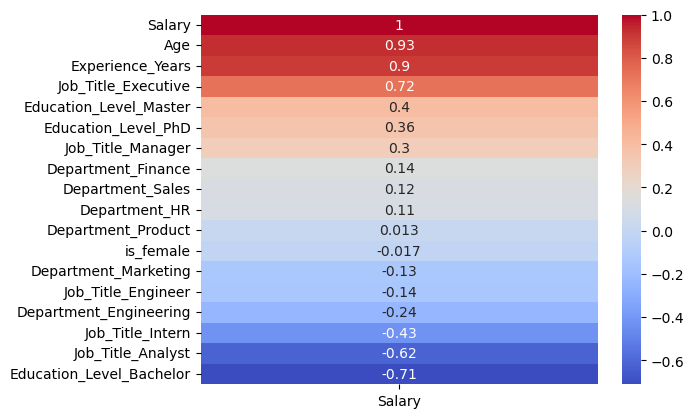

In [208]:
sns.heatmap(df_cleaned.corr()[['Salary']].sort_values(by='Salary', ascending=False), annot=True, cmap='coolwarm')

In [209]:
df_cleaned.head()

,Age,is_female,Experience_Years,Salary,Department_Engineering,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Analyst,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Bachelor,Education_Level_Master,Education_Level_PhD
0,24,1,1,90000,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,56,0,33,195000,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,21,0,1,35000,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,30,0,9,75000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,25,1,2,70000,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [210]:
from sklearn.preprocessing import StandardScaler

cols = ['Age', 'Experience_Years', 'Salary']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [211]:
df_cleaned

,Age,is_female,Experience_Years,Salary,Department_Engineering,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Analyst,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Bachelor,Education_Level_Master,Education_Level_PhD
0,-1.145623,1,-1.242926,-0.551007,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.054469,0,2.254918,1.728438,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,-1.445632,0,-1.242926,-1.745002,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,-0.545606,0,-0.368465,-0.876642,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,-1.045620,1,-1.133618,-0.985187,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.554455,0,1.708380,1.511348,0,0,0,0,0,1,0,0,1,0,0,0,1,0
9996,0.054412,1,-0.368465,1.077168,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9997,2.154472,0,1.926995,1.836983,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9998,0.154414,1,0.178073,0.425898,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [212]:
df_cleaned.columns

Index(['Age', 'is_female', 'Experience_Years', 'Salary',
       'Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_Marketing', 'Department_Product', 'Department_Sales',
       'Job_Title_Analyst', 'Job_Title_Engineer', 'Job_Title_Executive',
       'Job_Title_Intern', 'Job_Title_Manager', 'Education_Level_Bachelor',
       'Education_Level_Master', 'Education_Level_PhD'],
      dtype='object')

In [213]:
## pearson correlation to find out the features for extraction

from scipy.stats import pearsonr

selected_features = [
   'Age', 'is_female', 'Experience_Years', 'Salary',
       'Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_Marketing', 'Department_Product', 'Department_Sales',
       'Job_Title_Analyst', 'Job_Title_Engineer', 'Job_Title_Executive',
       'Job_Title_Intern', 'Job_Title_Manager', 'Education_Level_Bachelor',
       'Education_Level_Master', 'Education_Level_PhD'
]

correlations = {
    feature : pearsonr(df_cleaned[feature], df_cleaned['Salary'])[0]
    for feature in selected_features
}

# a dictionary will be created with all the correlations with charges col

correlations_df = pd.DataFrame(list(correlations.items()), 
                               columns=['Feature', 'Pearson Correlation'])

In [214]:
correlations_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
3,Salary,1.000000
0,Age,0.927958
2,Experience_Years,0.898025
12,Job_Title_Executive,0.720190
16,Education_Level_Master,0.403585
17,Education_Level_PhD,0.359712
14,Job_Title_Manager,0.304577
5,Department_Finance,0.141804
9,Department_Sales,0.115904
6,Department_HR,0.106723


In [217]:
cat_features = [
       'is_female','Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_Marketing', 'Department_Product', 'Department_Sales',
       'Job_Title_Analyst', 'Job_Title_Engineer', 'Job_Title_Executive',
       'Job_Title_Intern', 'Job_Title_Manager', 'Education_Level_Bachelor',
       'Education_Level_Master', 'Education_Level_PhD'
]

df_cleaned['Salary_bin'] = pd.qcut(df_cleaned['Salary'], q=4, labels=False)

In [218]:
from scipy.stats import chi2_contingency

alpha = 0.05
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['Salary_bin'])
    chi2_stat, p_val, _,_ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Features)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value' : p_val,
        'Decision' : decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
Department_Product,1694.689001,0.0,Reject Null (Keep Features)
Department_Sales,1537.464031,0.0,Reject Null (Keep Features)
Job_Title_Analyst,4814.434828,0.0,Reject Null (Keep Features)
Job_Title_Engineer,4092.62875,0.0,Reject Null (Keep Features)
Job_Title_Executive,8794.832293,0.0,Reject Null (Keep Features)
Job_Title_Intern,1839.277793,0.0,Reject Null (Keep Features)
Job_Title_Manager,7175.579907,0.0,Reject Null (Keep Features)
Education_Level_Bachelor,5271.305377,0.0,Reject Null (Keep Features)
Education_Level_Master,1975.518483,0.0,Reject Null (Keep Features)
Education_Level_PhD,1229.68015,0.0,Reject Null (Keep Features)


In [220]:
final_df = df_cleaned[['Age', 'Experience_Years', 'Salary',
       'Department_Engineering', 'Department_Finance', 'Department_HR',
       'Department_Marketing', 'Department_Product', 'Department_Sales',
       'Job_Title_Analyst', 'Job_Title_Engineer', 'Job_Title_Executive',
       'Job_Title_Intern', 'Job_Title_Manager', 'Education_Level_Bachelor',
       'Education_Level_Master', 'Education_Level_PhD']]


final_df

,Age,Experience_Years,Salary,Department_Engineering,Department_Finance,Department_HR,Department_Marketing,Department_Product,Department_Sales,Job_Title_Analyst,Job_Title_Engineer,Job_Title_Executive,Job_Title_Intern,Job_Title_Manager,Education_Level_Bachelor,Education_Level_Master,Education_Level_PhD
0,-1.145623,-1.242926,-0.551007,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.054469,2.254918,1.728438,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,-1.445632,-1.242926,-1.745002,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,-0.545606,-0.368465,-0.876642,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,-1.045620,-1.133618,-0.985187,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.554455,1.708380,1.511348,0,0,0,0,0,1,0,0,1,0,0,0,1,0
9996,0.054412,-0.368465,1.077168,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9997,2.154472,1.926995,1.836983,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9998,0.154414,0.178073,0.425898,1,0,0,0,0,0,0,0,0,0,1,0,1,0
